# Agrupamento Espectral

Uma abordagem diferente para realizar agrupamento!

### De onde vem o nome espectral?

### Vamos motivar o método por meio de um exemplo simples.

Seja $G(V, E)$ um grafo simples e não direcionado, como o do exemplo abaixo:

In [1]:
!pip install networkx
import scipy as sp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

You are using pip version 18.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


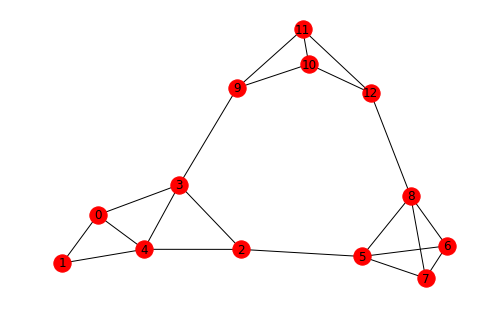

In [2]:
nodes = list(range(13))
edges = [(0, 1), (0, 3), (0, 4), (1, 4), (2, 3), (2, 4), (2, 5), (3, 4), 
         (3, 9), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8), (8, 12), (9, 10), (9, 11), (10, 11), (10, 12), (11, 12)]
labels = dict([(x, str(x)) for x in nodes])
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, pos = nx.spring_layout(G), labels = labels)
plt.draw()

### Repare que este grafo possui uma estrutura de comunidades. Veja no entanto que o grafo é conexo.

Considere as seguintes matrizes

In [3]:
A = nx.to_numpy_matrix(G)
A

matrix([[0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.]])

In [4]:
d = A.sum(axis = 1)
D = np.diag(np.squeeze(np.asarray(d)))
D

array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [5]:
L = D - A
L

matrix([[ 3., -1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  2.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  3., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
        [-1., -1., -1., -1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  4., -1., -1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  3., -1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1., -1.,  3., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1., -1., -1.,  4.,  0.,  0.,  0., -1.],
        [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  3., -1., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  3., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  3., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1., -1.,  3.]])

### O que podemos dizer sobre a matriz $L$ e o vetor de 1's?

In [6]:
m, n = L.shape
np.dot(L, np.ones(m))

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Agora considere esse grafo, bem similar

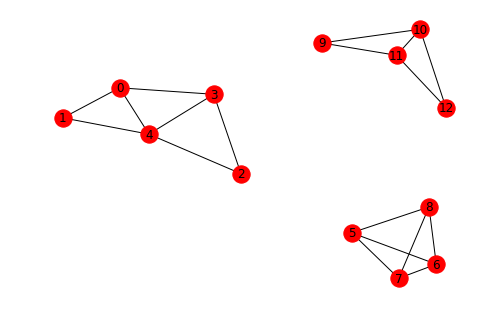

In [8]:
nodes = list(range(13))
edges = [(0, 1), (0, 3), (0, 4), (1, 4), (2, 3), (2, 4), (3, 4), 
         (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8), (9, 10), (9, 11), (10, 11), (10, 12), (11, 12)]
labels = dict([(x, str(x)) for x in nodes])
H = nx.Graph()
H.add_nodes_from(nodes)
H.add_edges_from(edges)
nx.draw(H, pos = nx.spring_layout(G), labels = labels)
plt.draw()


In [9]:
A = nx.to_numpy_matrix(H)
d = A.sum(axis = 1)
D = np.diag(np.squeeze(np.asarray(d)))
L = D - A
L
#!pip install array_to_latex

matrix([[ 3., -1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  2.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  2., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0., -1.,  3., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1., -1., -1., -1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  3., -1., -1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  3., -1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1., -1.,  3., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1., -1., -1.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  3., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  3., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  2.]])

In [10]:
u = np.concatenate([np.ones(5), np.zeros(8)])
v = np.concatenate([np.zeros(5), np.ones(4), np.zeros(4)])
w = np.concatenate([np.zeros(9), np.ones(4)])

In [11]:
np.dot(L, u)

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
np.dot(L, v)

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
np.dot(L, w)

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Veja que $u$, $v$ e $w$ também são autovetores de $L$. De fato, a estrutura de comunidades de um grafo pode ser explorada por meio da matriz Laplaciana, $L$.

### A multiplicidade de 0 como autovalor de $L$, corresponde ao número de componentes conexas do grafo.

### Além disso, observe que estes vetores se complementam. Assim, apenas olhando para os autovetores de $L$ podemos identificar as commponentes conexas do grafo.

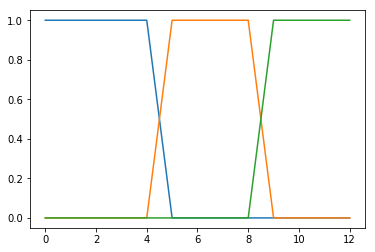

In [24]:
_ = plt.plot(u)
_ = plt.plot(v)
_ = plt.plot(w)

### Na prática:
* Nem sempre estamos trabalhando com grafos, e se apenas quisermos encontrar grupos em conjunto de dados?
* As componentes não são perfeitamente desconexas umas das outras. Hás sempre ruído!

### Vamos generalizar, sem provar, a ideia acima

Dada uma matriz $\mathbf{X}$, cujas linhas deseja-se agrupar, e um inteiro $k$ (número de grupos):

1. Crie um grafo $G(V, E, \omega)$, onde $\omega(x, y)$ represente a similaridade entre $x$ e $y$;
2. Conecte cada vértice do grafo aos $l$ vizinhos mais próximos;
3. Compute as matrizes $A$ e $D$ **(com base nas similaridades)**;
4. Compute a Laplaciana, $L$;
5. Obtenha os $k$ autovetores de associados aos $k$ menores autovalores de $L$. Denote-os por $\mathbf{u}_1, \dots, \mathbf{u}_k$;
6. Crie a matriz $\mathbf{U} = [\mathbf{u}_1 \dots \mathbf{u}_k]$;
7. Use KMeans na Matriz $\mathbf{U}$.

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import scipy.sparse.csgraph
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
from sklearn import datasets

In [15]:
def applyEspectral(X, k):
    sc = SpectralClustering(n_clusters=k, affinity='nearest_neighbors')
    sc.fit(X)
    y_sc = sc.labels_
    _ = plt.scatter(X[:, 0], X[:, 1], c=y_sc, s=10, cmap='viridis')

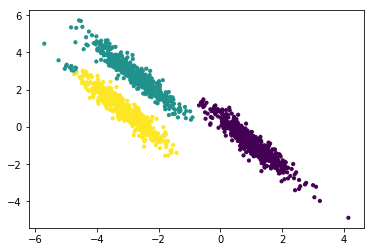

In [16]:
# Grupos elípticos

n_samples = 1500

random_state = 170
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
X = X_aniso

applyEspectral(X, 3)

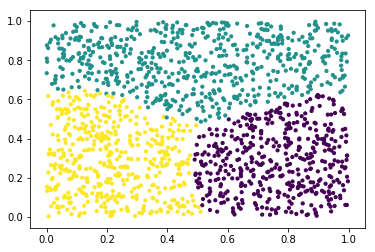

In [17]:
# Ruído

X = np.random.rand(n_samples, 2)
applyEspectral(X, 3)

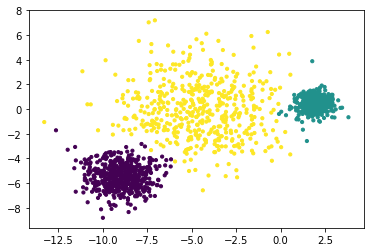

In [18]:
# Variâncias diferentes

X, _ = datasets.make_blobs(n_samples=n_samples,
                           cluster_std=[1.0, 2.5, 0.5],
                           random_state=random_state)
applyEspectral(X, 3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


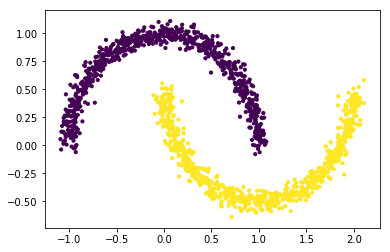

In [19]:
# luas

X, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
applyEspectral(X, 2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


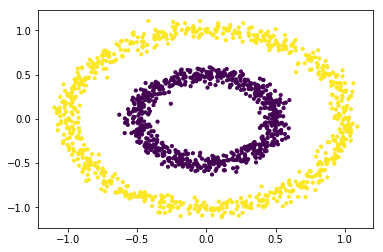

In [20]:
X, _ = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
applyEspectral(X, 2)